# Classificação de vídeos com PYTHON - PARTE 1

### Vídeos são um conjunto de imagens (frames) organizadas em uma determinada ordem.

***

## 1. Reconhecimento de imagens com KERAS

### O dataset utilizado neste notebook foi o [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist).

In [16]:
# Importação de bibliotecas;

import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt

In [17]:
# Acessando aos dados:

dataset = keras.datasets.fashion_mnist
((imagens_treino, id_treino), (imagens_teste, id_teste)) = dataset.load_data()     # Load_data: função do keras. Devolve 2 tuplas contendo os dados de treino e os dados de teste.

In [18]:
# Investigação preliminar das imagens:

imagens_treino.shape

(60000, 28, 28)

#### Note que são 60000 imagens descritas em 28 linhas e 28 colunas (28x28)

In [19]:
imagens_teste.shape

(10000, 28, 28)

#### São, no total, 70mil imagens de dimensões 28x28 pixels.

In [20]:
# Investigação preliminar das informações:

print(len(id_treino))
print(len(id_teste))

60000
10000


In [21]:
# Verificando as identificações disponíveis:

np.unique(id_treino)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [22]:
total_ids = 10

#### De acordo com a documentação do dataset, as identificações das roupas/calçados (id_treino e id_teste) estão dispostas da seguinte forma:

<img src='data/labels.png'>

In [23]:
# Traduzindo os labels:

labels = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

Text(0.5, 1.0, '9')

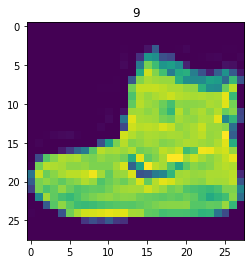

In [24]:
# Visualizando uma imagem (matplotlib):

plt.imshow(imagens_treino[0])
plt.title(id_treino[0])

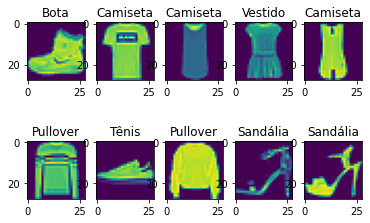

In [25]:
# Visualizando 10 imagens:

for imagem in range(10):
    
    plt.subplot(2,5,imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(labels[id_treino[imagem]])

***

### O modelo terá 3 etapas que acontecerão em sequência. São elas:

* Entrada
* Processamento
* Saída

***

In [26]:
# Camada 0 (entrada): Achatamento dos dados. Uma imagem com dimensões 28x28 (array de 2 dimensões) será transformada num array de 1 dimensão.

# Camada 1 (processamento): É uma camada mais densa. Parâmetro da função Dense: número de funções (aleatório - são necessários testes para saber o melhor). 
#                           Preferencialmente número par. Segundo parâmetro: activation, que define como essas funções da camada 1 se comunicarão com as da camada 0.
#                           Dentro do tensorflow,na parte de redes neurais (Neural Networks), existe uma função chamada relu, que tem sido usada nessas ocasiões.

# Camada 2 (saída): Primeiro parâmetro é o número de classificações do nosso modelo (10).


modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),   # entrada
    keras.layers.Dense(256, activation = tensorflow.nn.relu),        # processamento
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)          # saída
])

### Sobre a função ReLu (Unidade Linear Retificada):

* É uma função não-linear.
* Valores de entrada negativos são convertidos para valores de saída iguais a zero.
* Valores de entrada positivos dão origem a valores de saída positivos.

### Sobre a função Softmax:

* Calcula as probabilidades de uma determinada classificação está correta. Retornará um valor entre 0 e 1.

### O modelo acima é considerado um modelo de 2 camadas.

In [27]:
# Compilação do modelo:

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

In [28]:
# Treinamento do modelo:

modelo.fit(imagens_treino, id_treino)

1875/1875 [==============================] - 2s 823us/step - loss: 3.5169
